In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from numpy.linalg import norm
from sklearn.metrics import r2_score
from jupyterthemes import jtplot
jtplot.style(theme="monokai", context="notebook", ticks=True, grid=False)

In [2]:
columns = ["mpg","cylinders","displacement","horsepower","weight","acceleration","model year","origin","car name"]
df = pd.read_csv("auto-mpg.data", header = None , delim_whitespace = True)
df.columns = columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [3]:
df.head()

mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0      150.0  3436.0          11.0          70   
3  16.0          8         304.0      150.0  3433.0          12.0          70   
4  17.0          8         302.0      140.0  3449.0          10.5          70   

   origin                   car name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino

In [4]:
df["displacement"] = pd.to_numeric(df["displacement"],errors = "coerce")
df["horsepower"] = pd.to_numeric(df["horsepower"],errors = "coerce")
df["weight"] = pd.to_numeric(df["weight"],errors = "coerce")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


<AxesSubplot:>

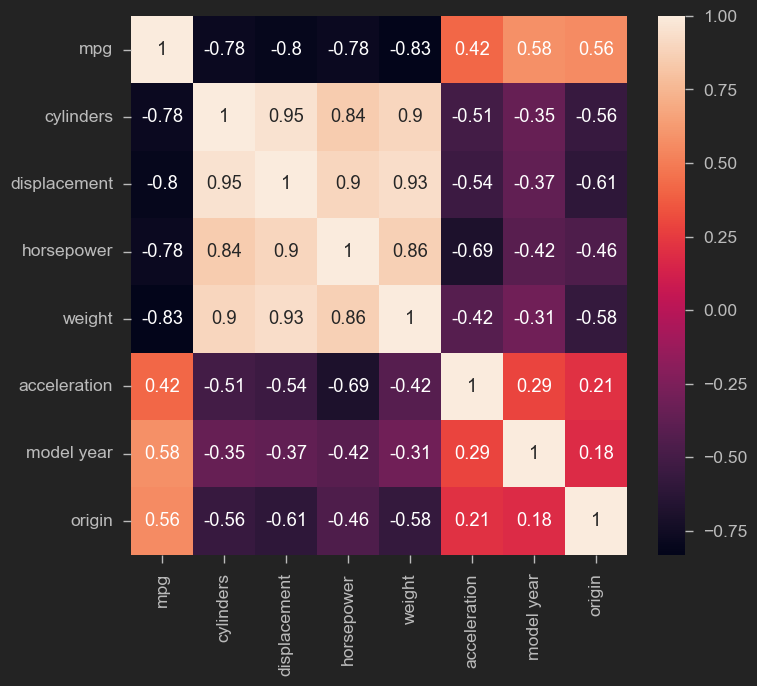

In [6]:
sns.heatmap(df.corr(),annot = True)

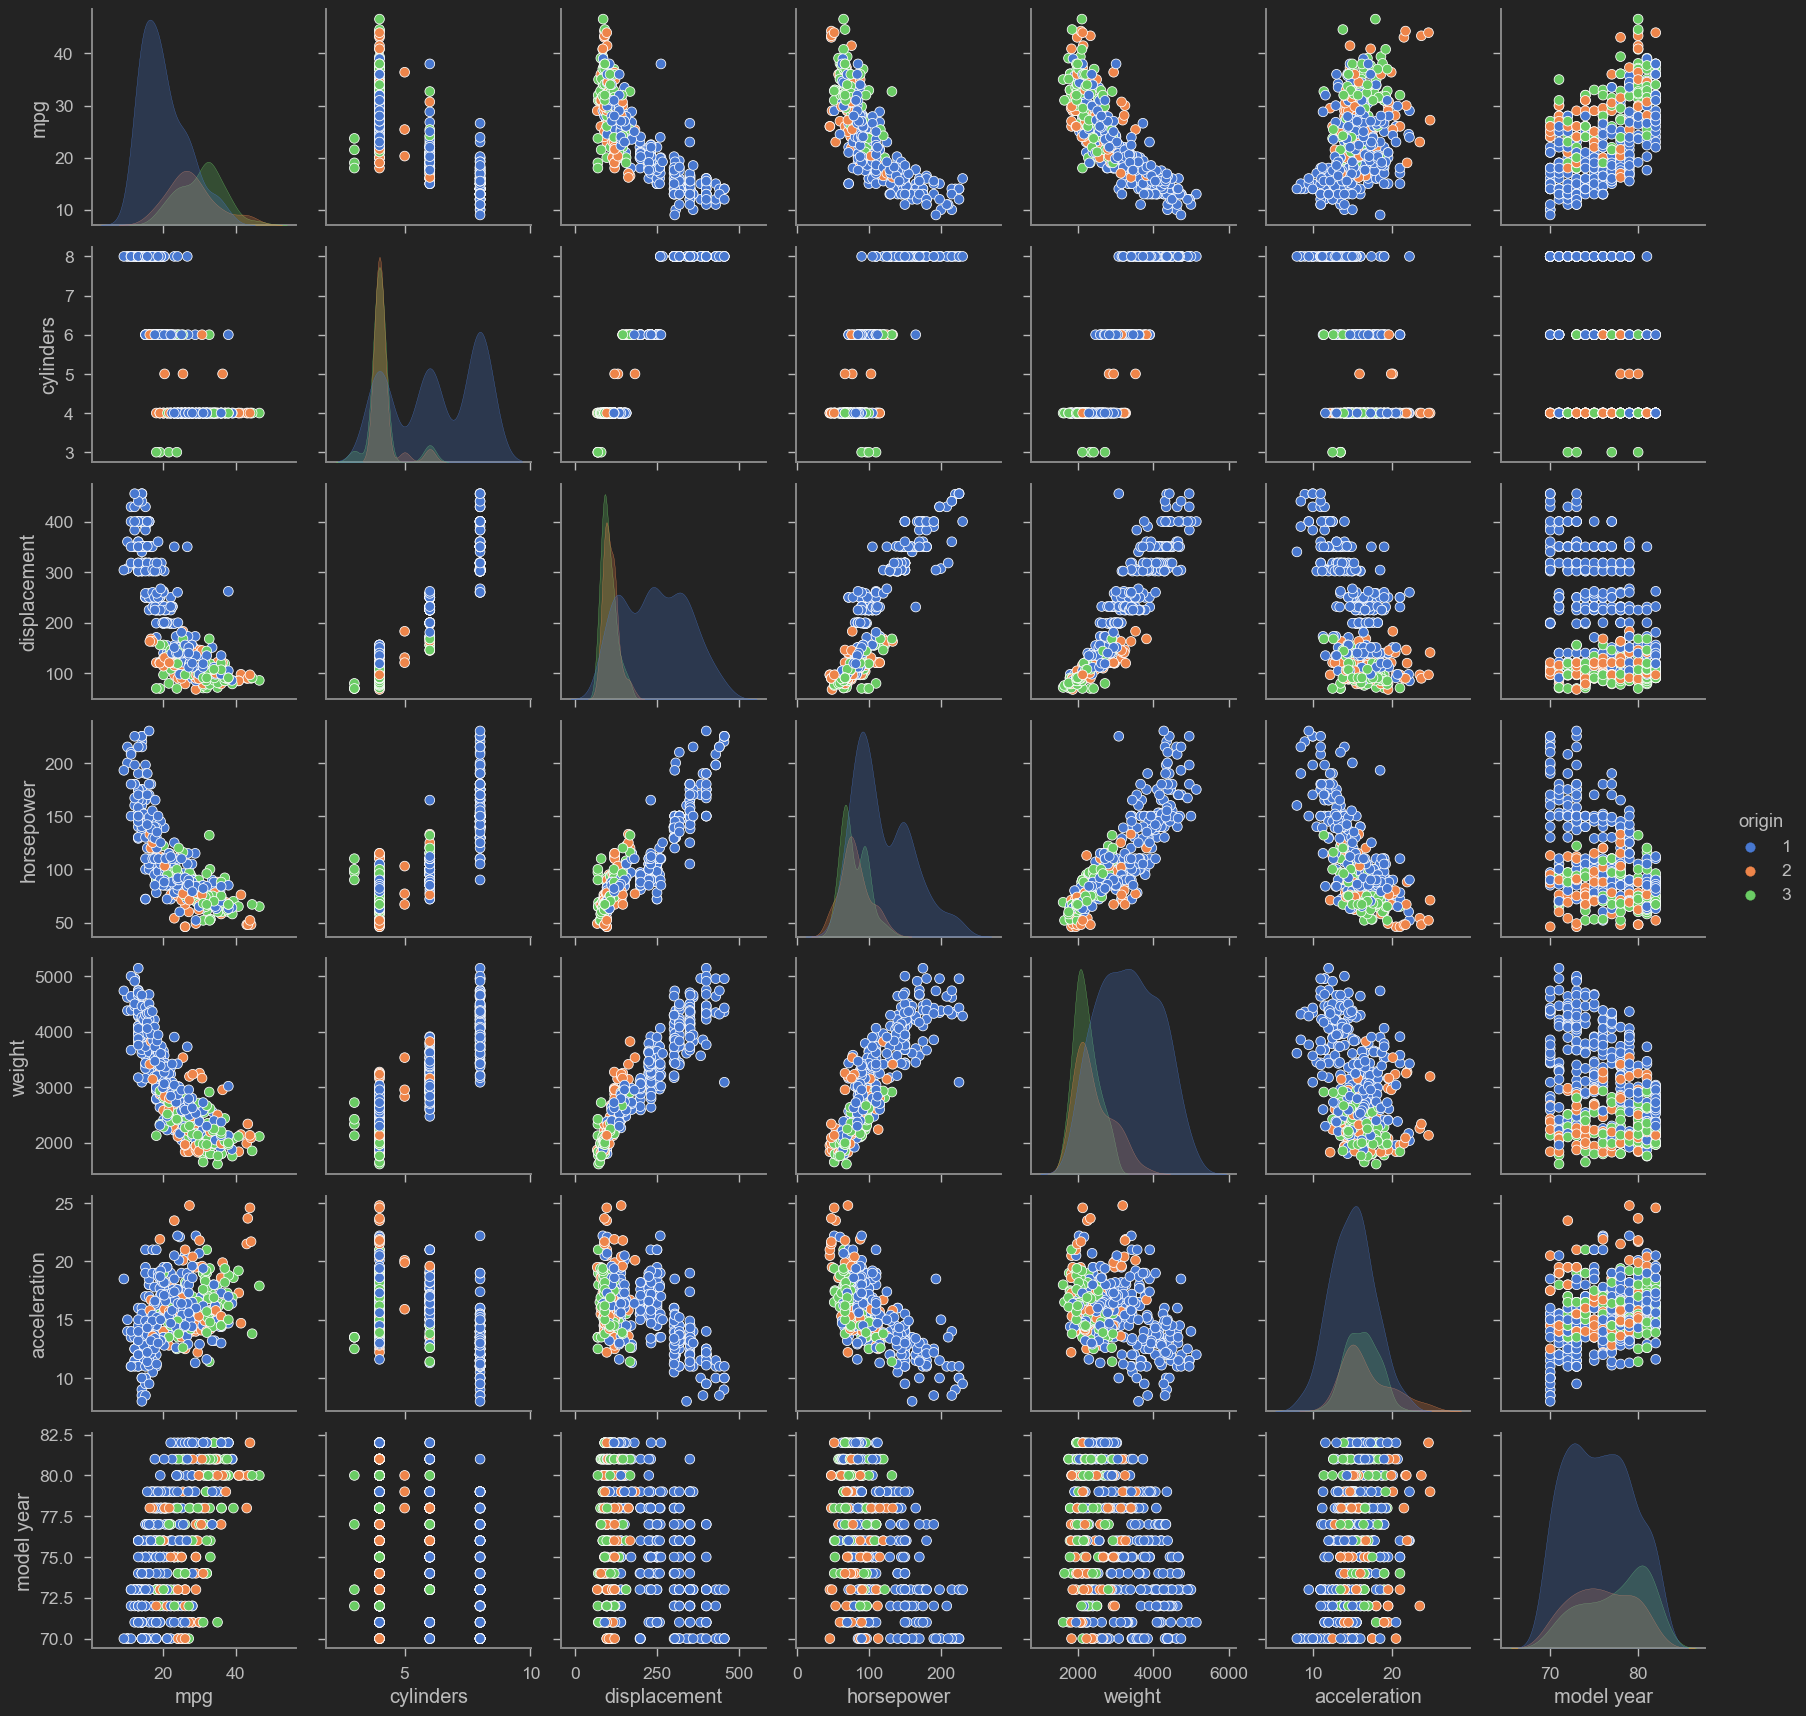

In [7]:
sns.pairplot(df , hue = "origin" , palette ="muted")

In [8]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [9]:
df = df.dropna()

In [10]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [11]:
def LR_Model(X_col,Y_col):
    test_list = [0.2,0.4,0.5,0.6,0.8]
    score_list =[]
    for test_size in test_list :
        print(f"for {X_col} : and for test size equal {test_size} ")
        X = df[X_col].to_numpy().reshape(-1,1)
        Y = df["mpg"].to_numpy().reshape(-1,1)
        X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = test_size,random_state=0)
        regressor = LinearRegression()
        r = regressor.fit(X_train,y_train)
        y_pred = regressor.predict(X_test)
        r_sq = regressor.score(X,Y)
        score_list.append(r_sq)
        print(f'coefficient of determination for {X_col} :', r_sq)
        plt.scatter(X_train, y_train, color='red') 
        plt.plot(X_train, regressor.predict(X_train), color='blue') 
        plt.title(f"{X_col} vs {Y_col} (Training set)") 
        plt.xlabel(X_col) 
        plt.ylabel(f"{Y_col}") 
        plt.show()
        print("---------------------------------------------------------------------------------------------")
        plt.scatter(X_test, y_test, color='red') 
        plt.plot(X_train, regressor.predict(X_train), color='blue') 
        plt.title(f"{X_col} vs {Y_col} (Test set)") 
        plt.xlabel(X_col) 
        plt.ylabel(f"{Y_col}") 
        plt.show() 
        print("---------------------------------------------------------------------------------------------")
    avg_score = sum(score_list) / len(score_list)    
    print("the average score is ", avg_score)

for displacement : and for test size equal 0.2 
coefficient of determination for displacement : 0.6481521023561414


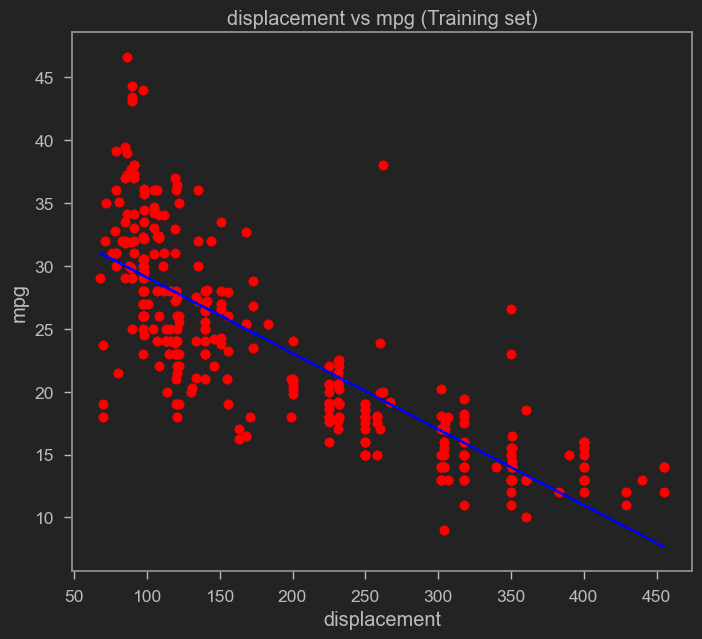

---------------------------------------------------------------------------------------------


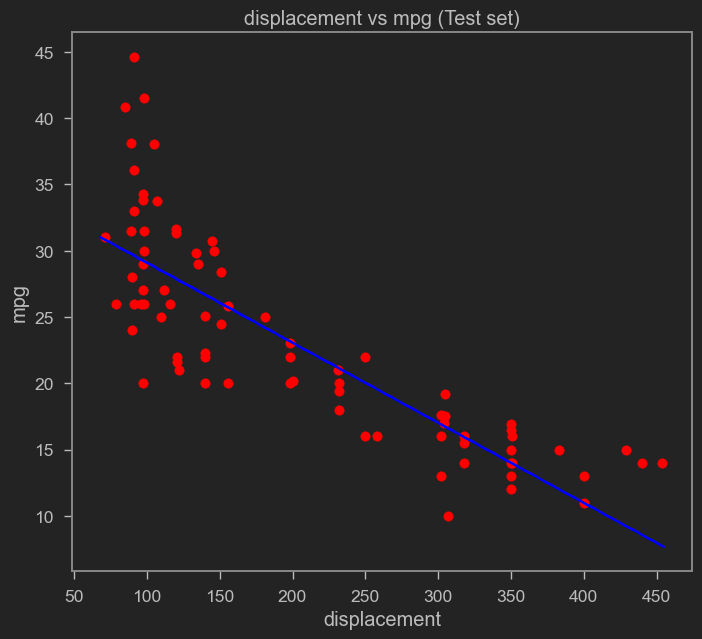

---------------------------------------------------------------------------------------------
for displacement : and for test size equal 0.4 
coefficient of determination for displacement : 0.6476874708299841


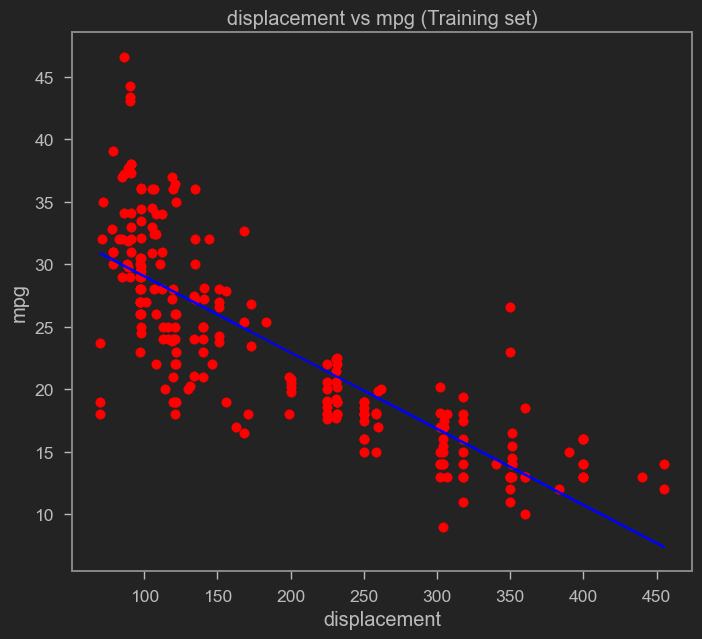

---------------------------------------------------------------------------------------------


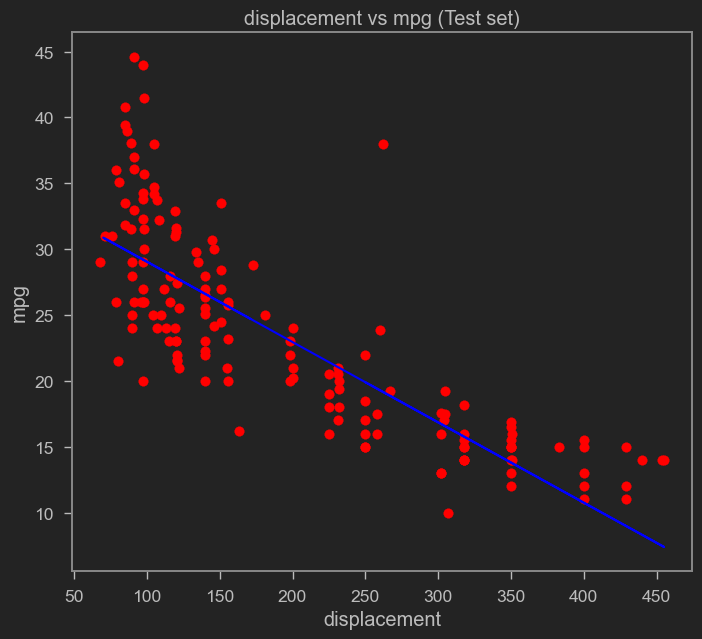

---------------------------------------------------------------------------------------------
for displacement : and for test size equal 0.5 
coefficient of determination for displacement : 0.6479978380890417


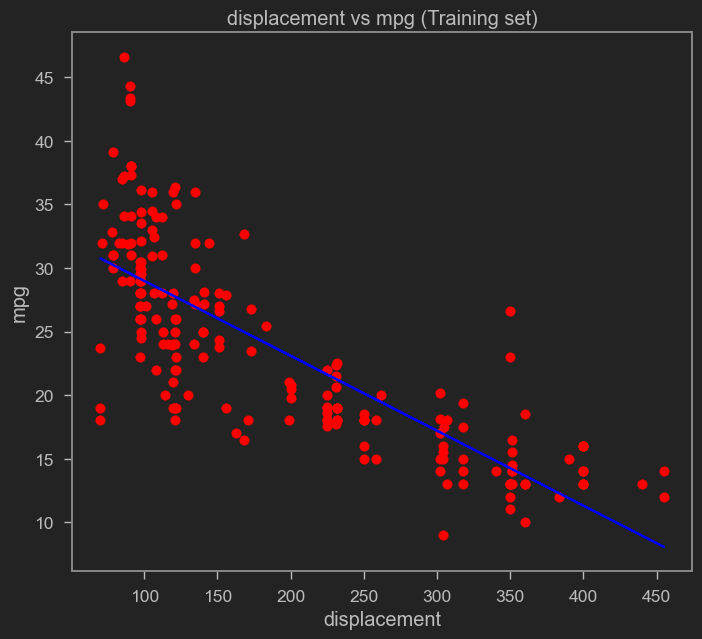

---------------------------------------------------------------------------------------------


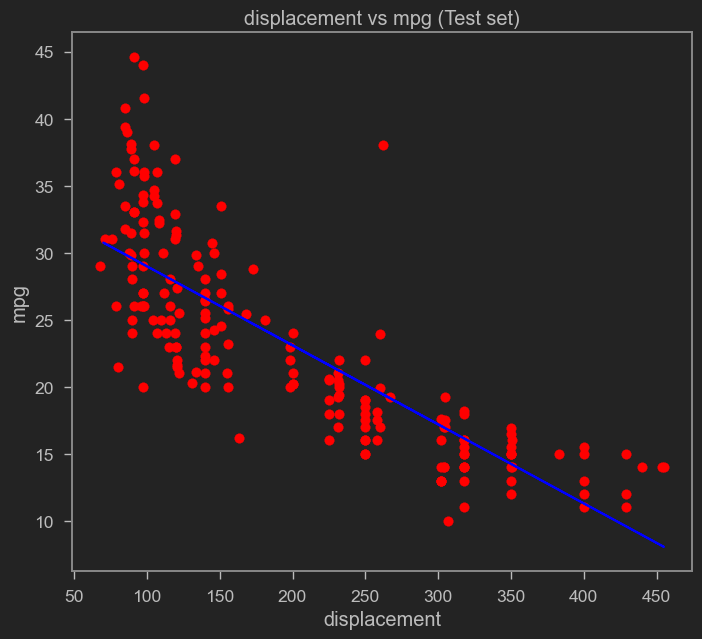

---------------------------------------------------------------------------------------------
for displacement : and for test size equal 0.6 
coefficient of determination for displacement : 0.6466957193647155


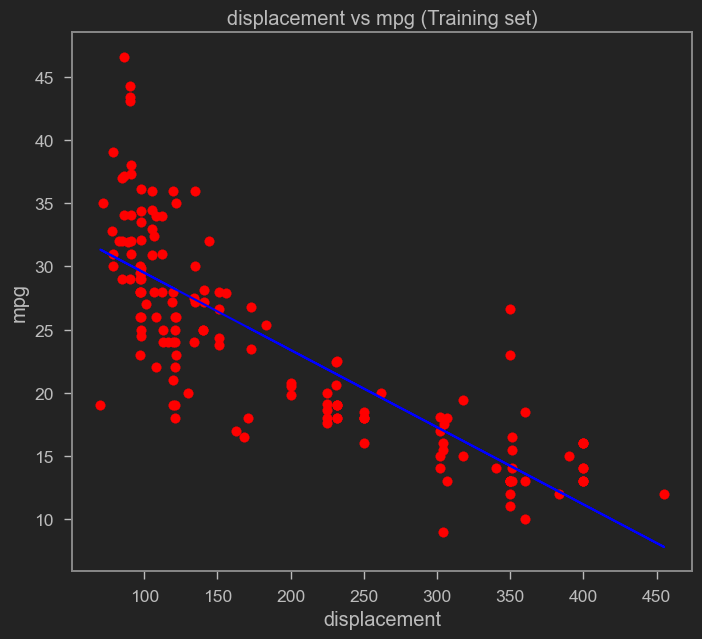

---------------------------------------------------------------------------------------------


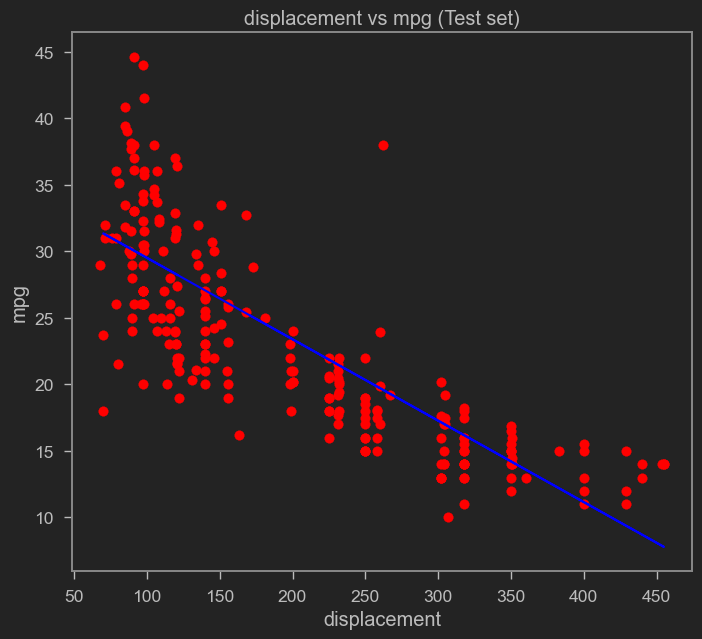

---------------------------------------------------------------------------------------------
for displacement : and for test size equal 0.8 
coefficient of determination for displacement : 0.6451443744626841


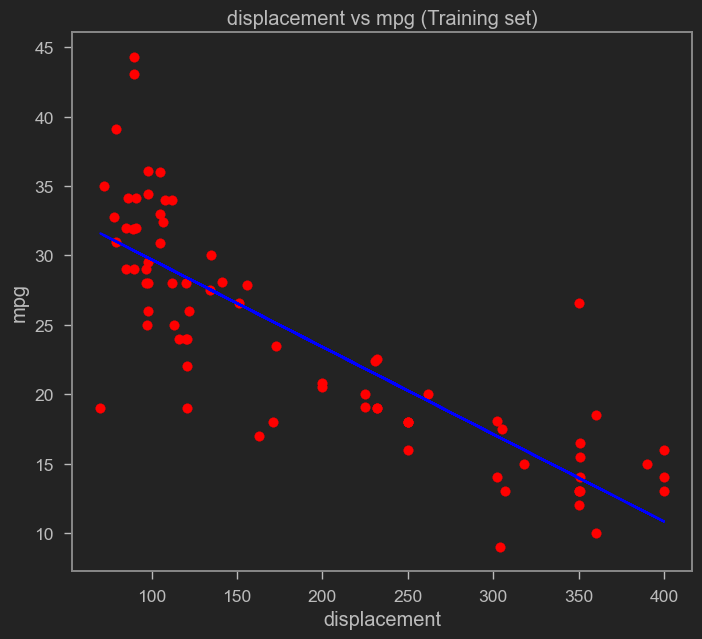

---------------------------------------------------------------------------------------------


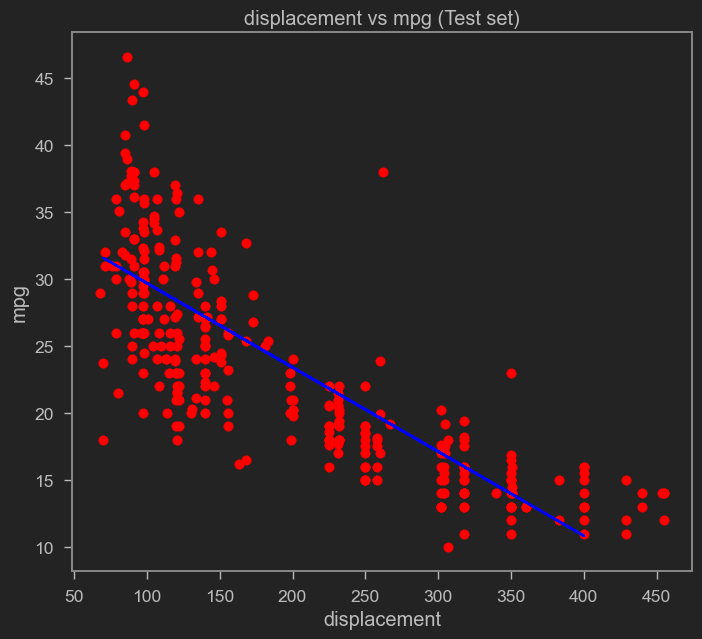

---------------------------------------------------------------------------------------------
the average score is  0.6471355010205133


In [12]:
LR_Model("displacement","mpg")

for horsepower : and for test size equal 0.2 
coefficient of determination for horsepower : 0.6059177548718202


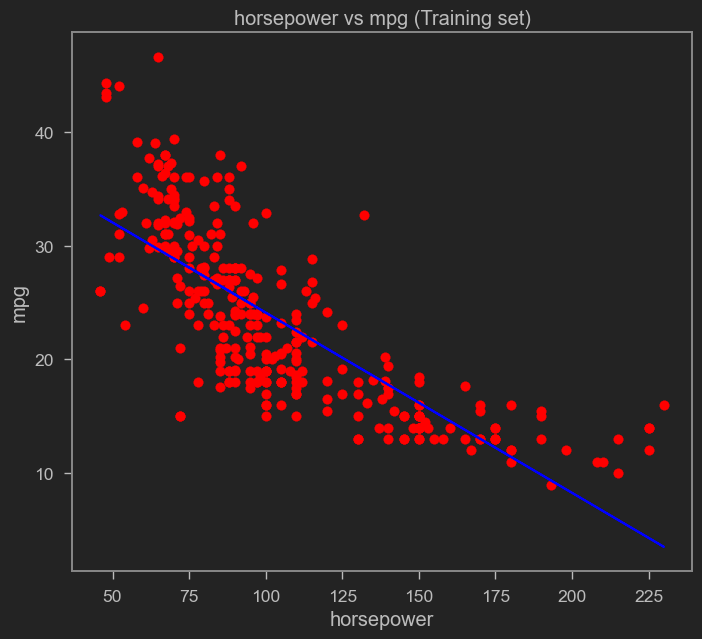

---------------------------------------------------------------------------------------------


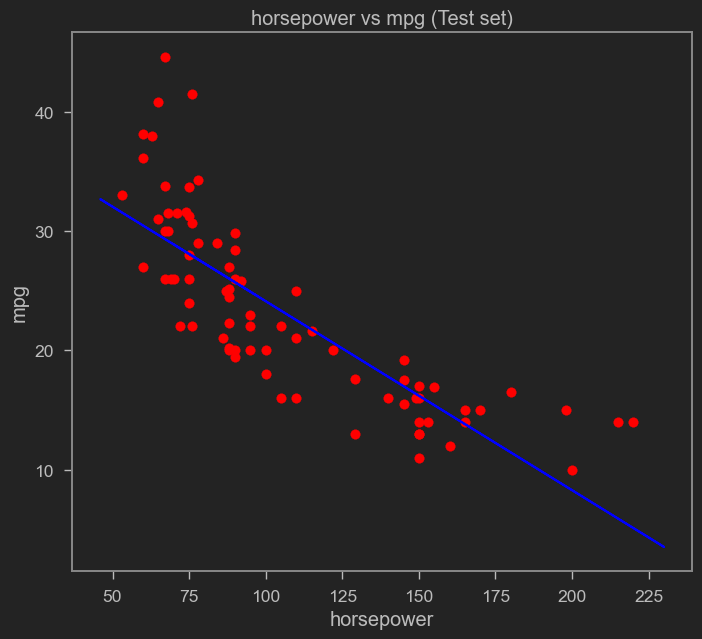

---------------------------------------------------------------------------------------------
for horsepower : and for test size equal 0.4 
coefficient of determination for horsepower : 0.6057763989089235


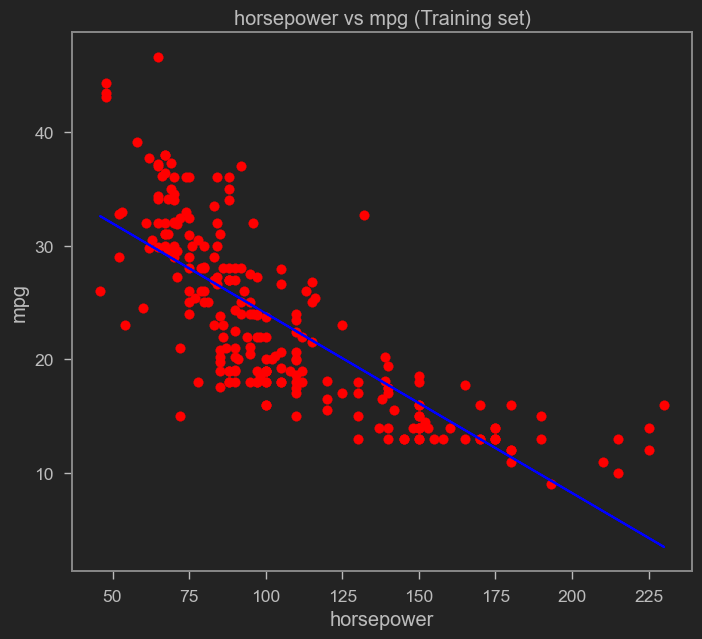

---------------------------------------------------------------------------------------------


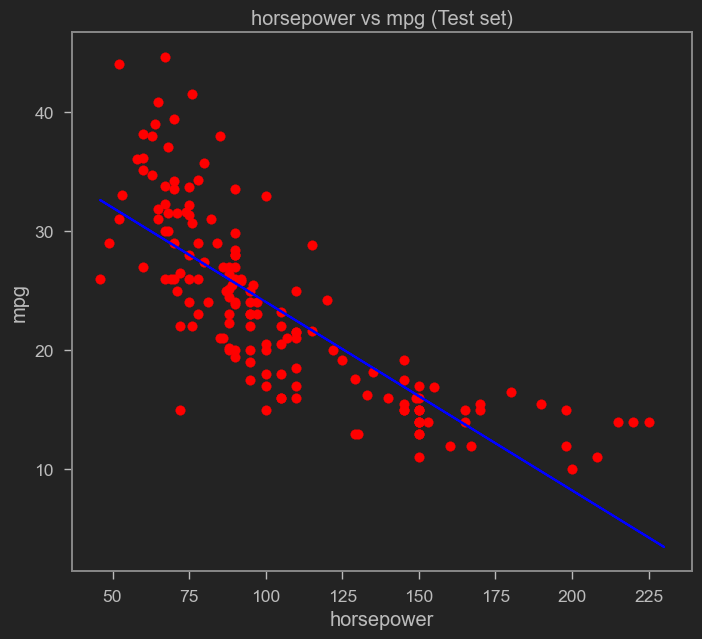

---------------------------------------------------------------------------------------------
for horsepower : and for test size equal 0.5 
coefficient of determination for horsepower : 0.6056115500783197


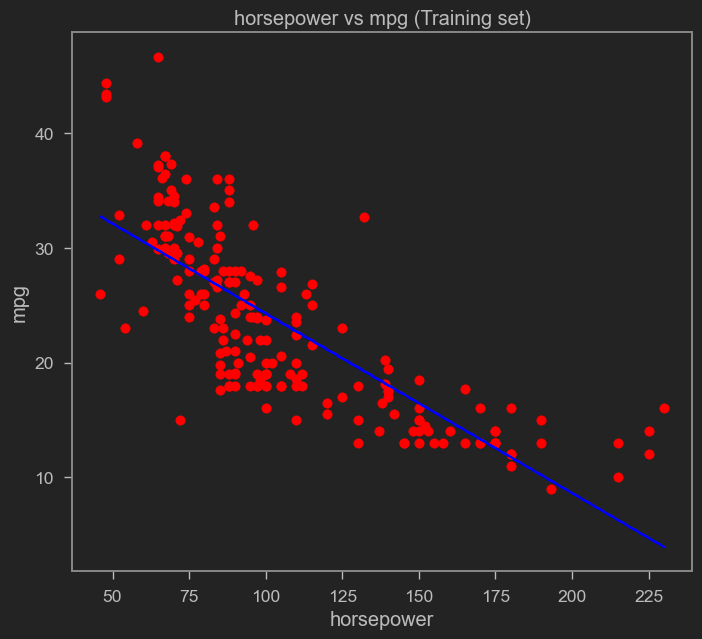

---------------------------------------------------------------------------------------------


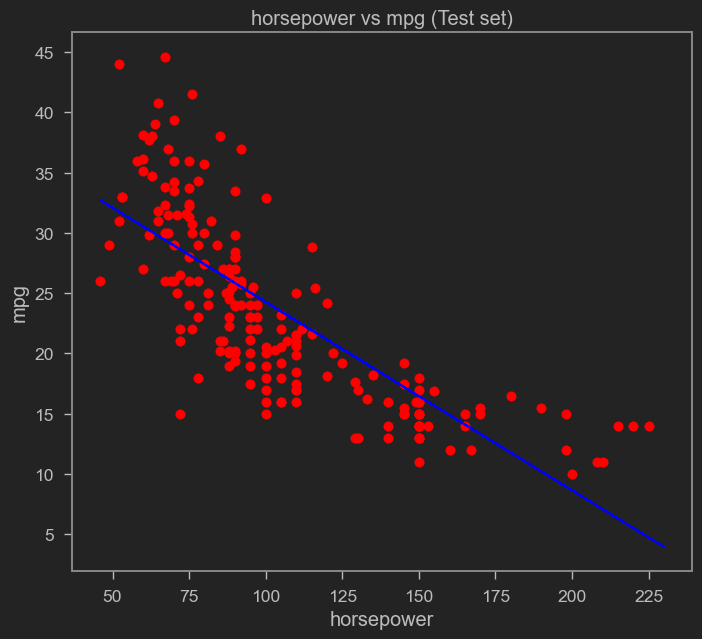

---------------------------------------------------------------------------------------------
for horsepower : and for test size equal 0.6 
coefficient of determination for horsepower : 0.602597999720724


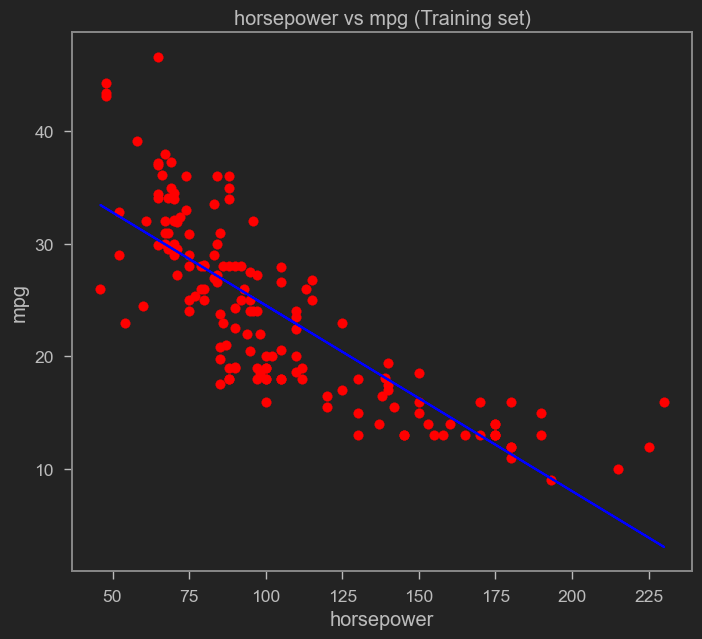

---------------------------------------------------------------------------------------------


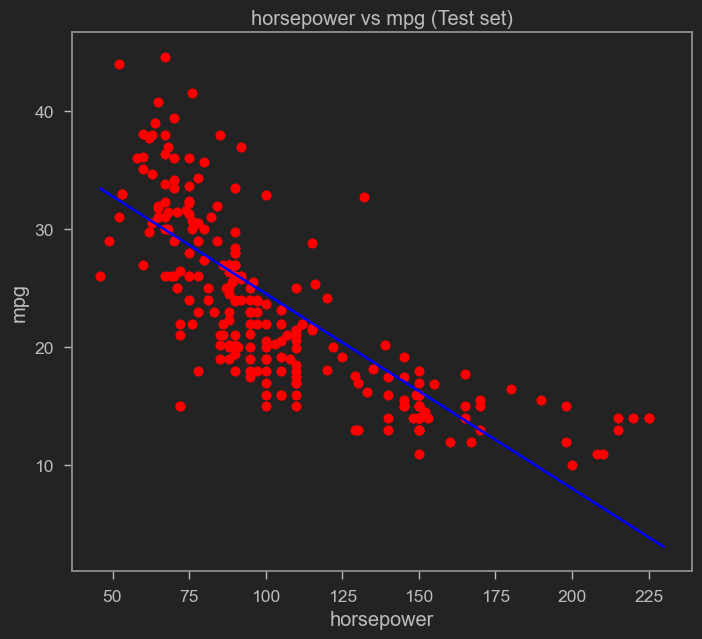

---------------------------------------------------------------------------------------------
for horsepower : and for test size equal 0.8 
coefficient of determination for horsepower : 0.6024539246056764


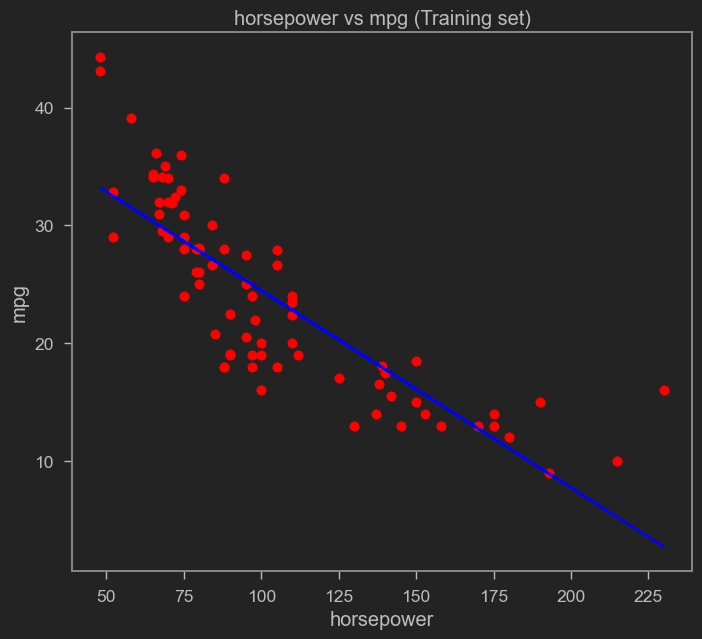

---------------------------------------------------------------------------------------------


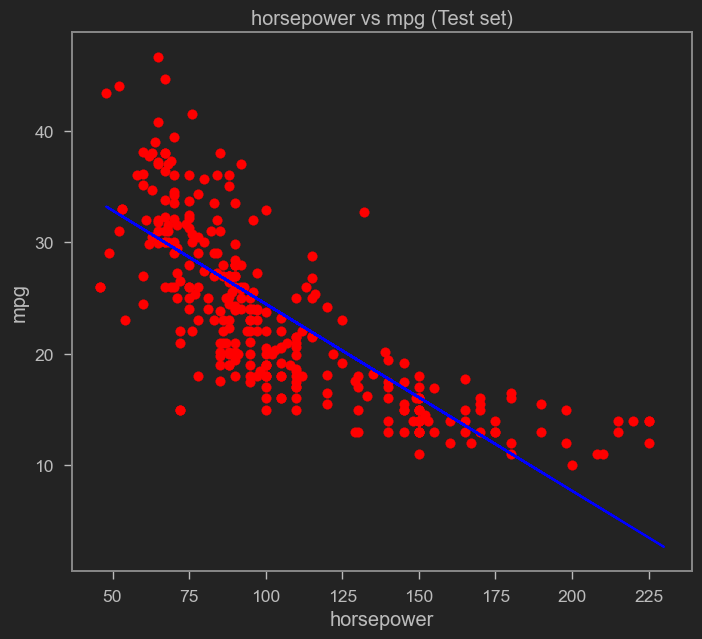

---------------------------------------------------------------------------------------------
the average score is  0.6044715256370928


In [13]:
LR_Model("horsepower","mpg")

for weight : and for test size equal 0.2 
coefficient of determination for weight : 0.692564100650704


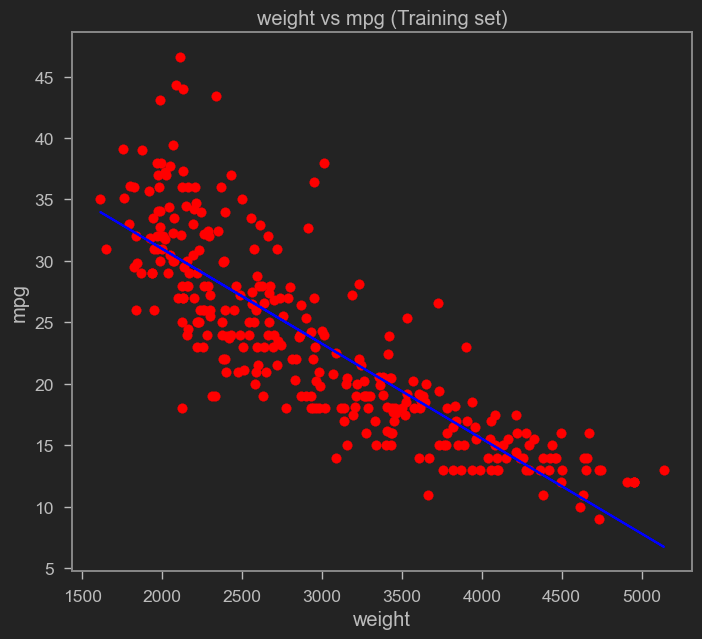

---------------------------------------------------------------------------------------------


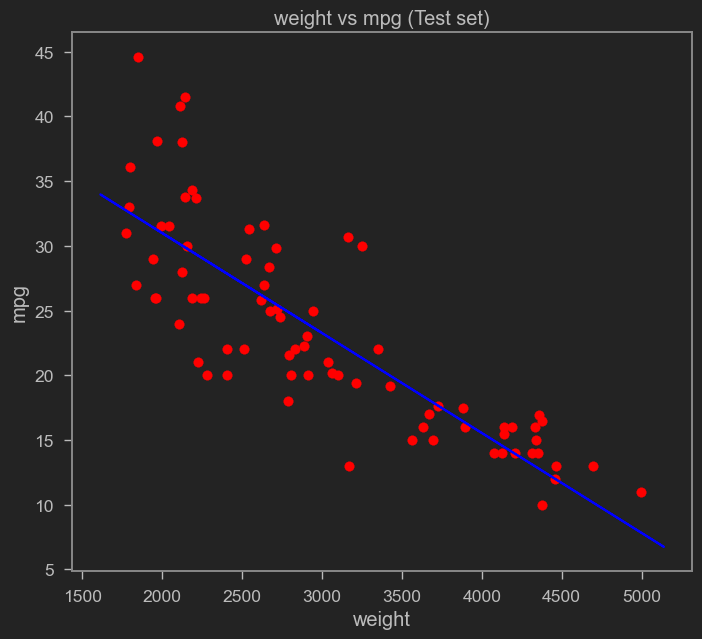

---------------------------------------------------------------------------------------------
for weight : and for test size equal 0.4 
coefficient of determination for weight : 0.6924651723789469


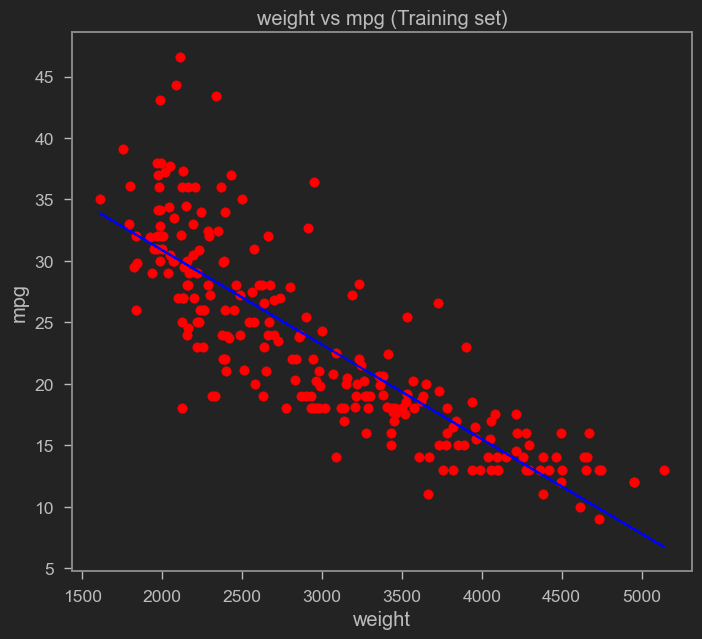

---------------------------------------------------------------------------------------------


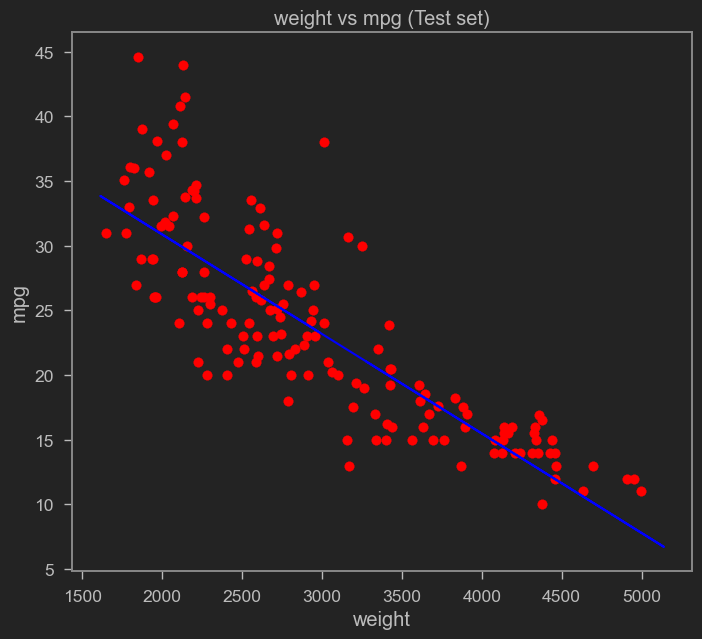

---------------------------------------------------------------------------------------------
for weight : and for test size equal 0.5 
coefficient of determination for weight : 0.6926198177177256


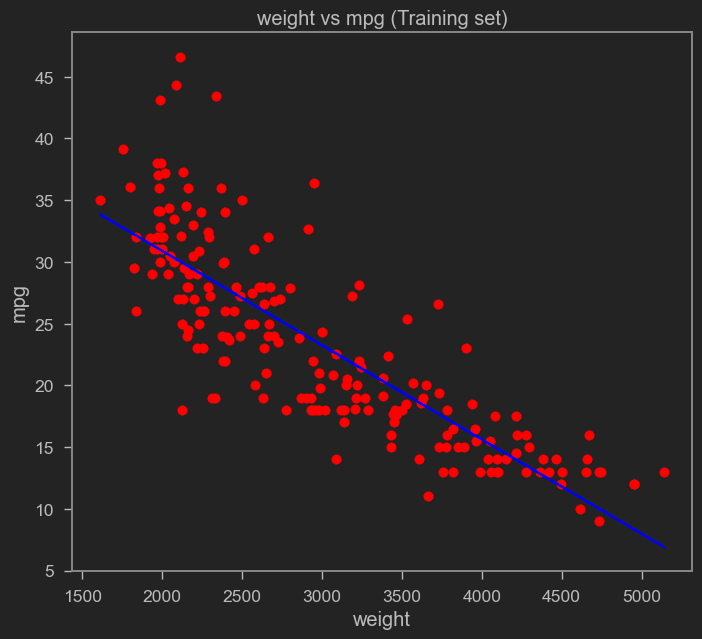

---------------------------------------------------------------------------------------------


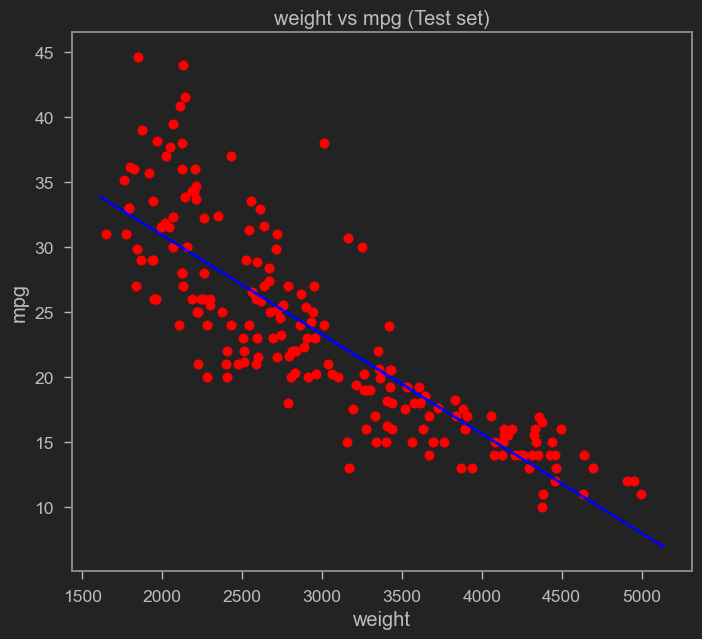

---------------------------------------------------------------------------------------------
for weight : and for test size equal 0.6 
coefficient of determination for weight : 0.6902272008634212


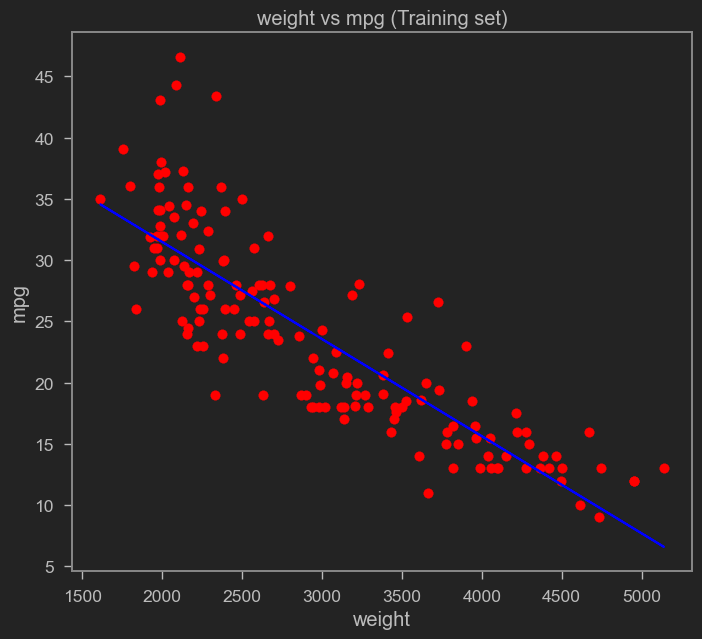

---------------------------------------------------------------------------------------------


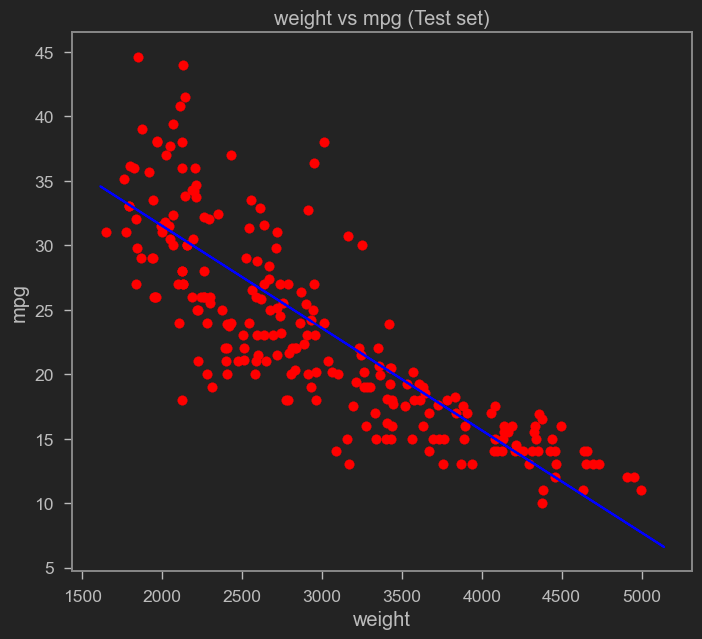

---------------------------------------------------------------------------------------------
for weight : and for test size equal 0.8 
coefficient of determination for weight : 0.6892273403208101


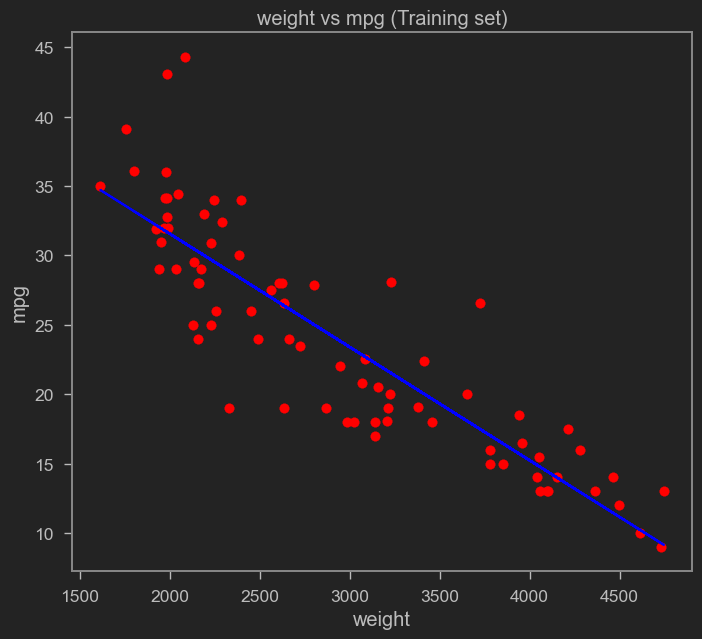

---------------------------------------------------------------------------------------------


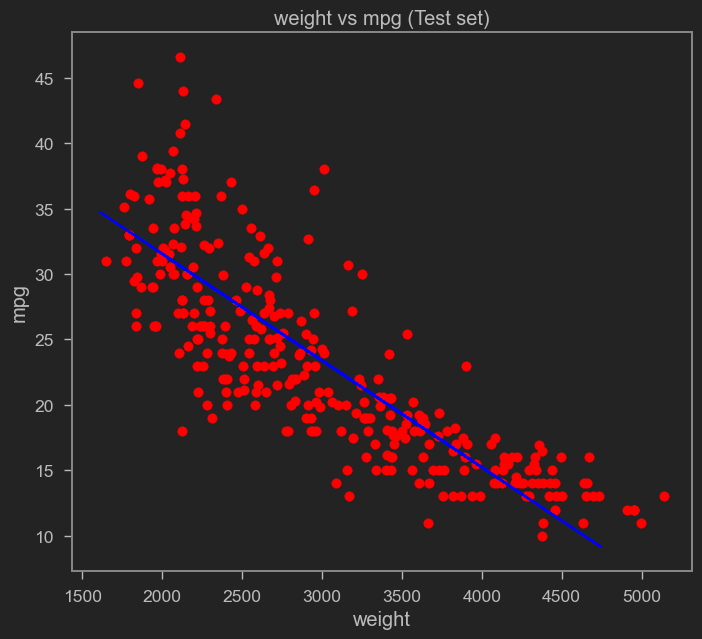

---------------------------------------------------------------------------------------------
the average score is  0.6914207263863215


In [14]:
LR_Model("weight","mpg")

### test size 0.2 is the best

# My Linear Regression Model

In [15]:
def gradient_descent(X,Y,learn_rate,max_iter):
    theta_0 , theta_1 = 0 , 0
    cost_list = []
    theta_0_list = []
    theta_1_list = []
    predicted=[]
    counter = 0
    for i in range(max_iter): 
        # calculate h(theta)
        predicted_Y = theta_0 + theta_1 * X
        predicted.append(predicted_Y)
        # calculate cost function
        cost_fun = sum((predicted_Y - Y)**2) / (2*len(Y))
        cost_list.append(cost_fun)
        # calculate gradient
        grad_0 = sum(predicted_Y - Y) / len(Y)
        grad_1 = sum((predicted_Y - Y)* X) / len(Y) 
        grad = np.array([grad_0,grad_1])
        # update thetas
        theta_0 = theta_0 - learn_rate * grad_0
        theta_1 = theta_1 - learn_rate * grad_1    
        theta_0_list.append(theta_0)
        theta_1_list.append(theta_1)
        counter += 1
        if len(cost_list) > 1 :
            if norm(grad) < 0.0001:
                break
            elif np.absolute(cost_list[i] - cost_list[i-1]) < 0.0001 :
                break
            elif np.absolute(norm([theta_0_list[i],theta_1_list[i]]) - norm([theta_0_list[i-1],theta_1_list[i-1]])) < 0.0001 :
                break
    return theta_0_list , theta_1_list , cost_list , predicted , theta_0_list[-1] , theta_1_list[-1] , counter

In [16]:
def My_LR_Model(X_col,Y_col,learn_rate,max_iter):
    print(f"for {X_col} : and the test size equal 0.2 ")
    X = df[X_col].to_numpy().reshape(-1,1)
    Y = df[Y_col].to_numpy().reshape(-1,1)
    X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2 , random_state=0)
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    theta_0_list , theta_1_list , cost_list , predicted , optim_theta_0 , optim_theta_1 , counter = gradient_descent(X_train,y_train,learn_rate,max_iter)
    hypo = optim_theta_0 + optim_theta_1 * X_test
    score = r2_score(y_test,hypo)
    print("the score is : ",score )
    print("------------------------------------------------------------------------------")
    max_iter = list(range(counter))
    plt.plot(max_iter,cost_list)
    plt.xlabel("Number of Iterations")
    plt.ylabel("Cost Function")
    plt.title(f"Cost Function (vs) Number of Iterations for {X_col}")
    plt.show()
    print("------------------------------------------------------------------------------")
    plt.plot(theta_0_list,cost_list)
    plt.xlabel("0-Thetas")
    plt.ylabel("Cost Function")
    plt.title(f"Cost Function (vs) Thetas-0 for {X_col}")
    plt.show()
    print("------------------------------------------------------------------------------")
    plt.plot(theta_1_list,cost_list)
    plt.xlabel("1-Thetas")
    plt.ylabel("Cost Function")
    plt.title(f"Cost Function (vs) Thetas-1 for {X_col}")
    plt.show()
    print("------------------------------------------------------------------------------")
    plt.scatter(X_train,y_train)
    for i in range(len(predicted)):    
        plt.plot(X_train,predicted[i])
    plt.xlabel("Original X-Data {X_col}")
    plt.ylabel("All Predicted Output")
    plt.title(f"All predicted Output (vs) Original X-Data for {X_col}")
    plt.show()
    print("------------------------------------------------------------------------------")
    plt.scatter(X_train,y_train)
    plt.plot(X_train,predicted[-1] , color ="red")
    plt.xlabel("Original X-Data {X_col}")
    plt.ylabel("The fitted Line")
    plt.title(f"The fitted Line (vs) Original X-Data {X_col}")
    plt.show()
    print("------------------------------------------------------------------------------")

for displacement : and the test size equal 0.2 
the score is :  0.679819352025522
------------------------------------------------------------------------------


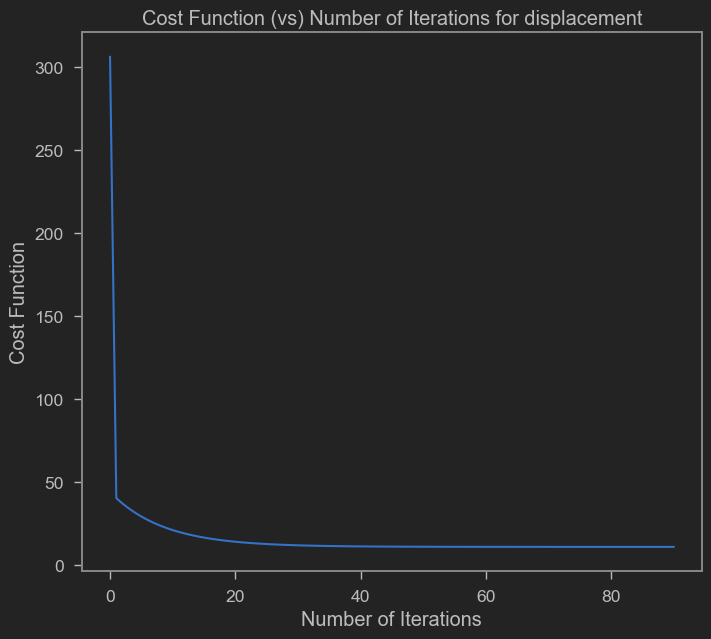

------------------------------------------------------------------------------


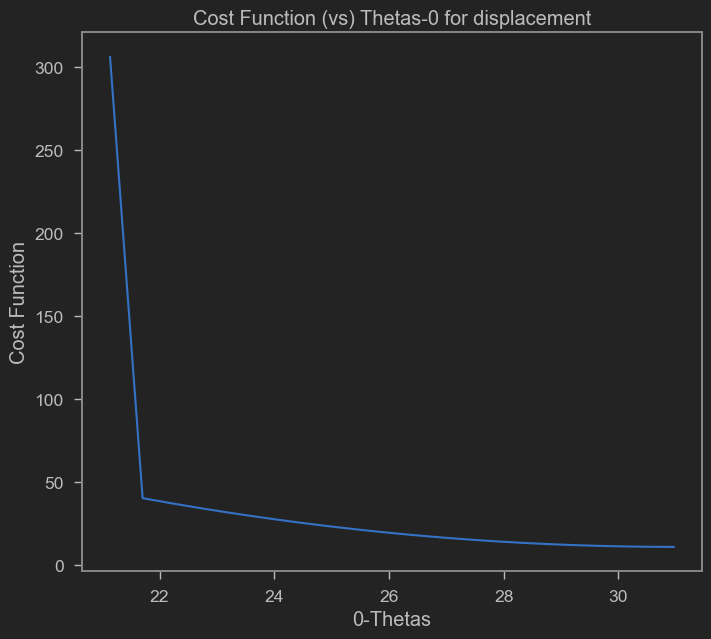

------------------------------------------------------------------------------


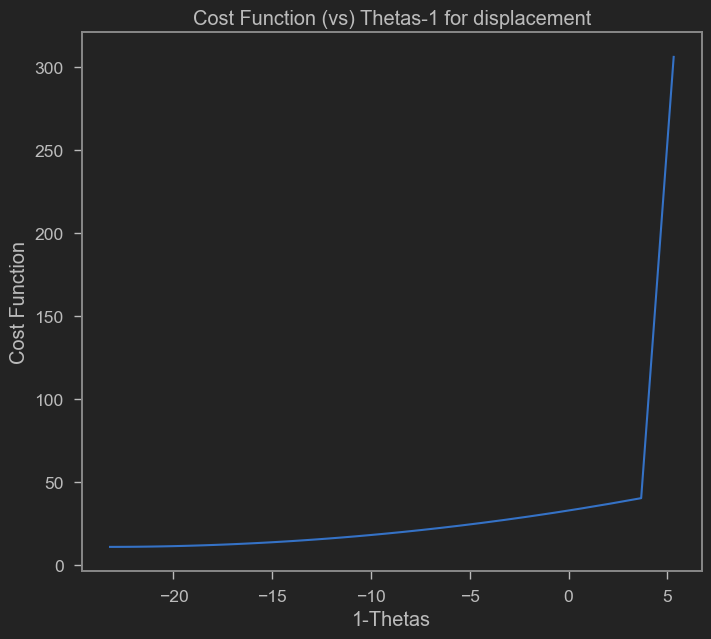

------------------------------------------------------------------------------


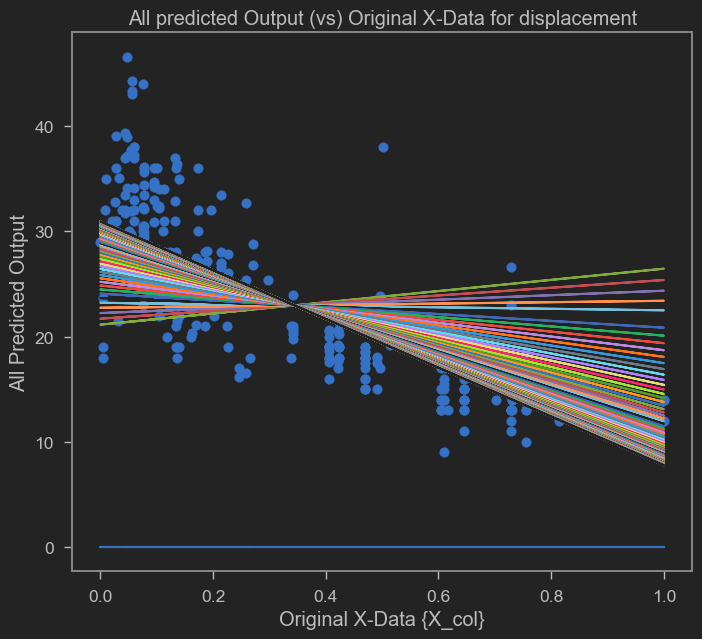

------------------------------------------------------------------------------


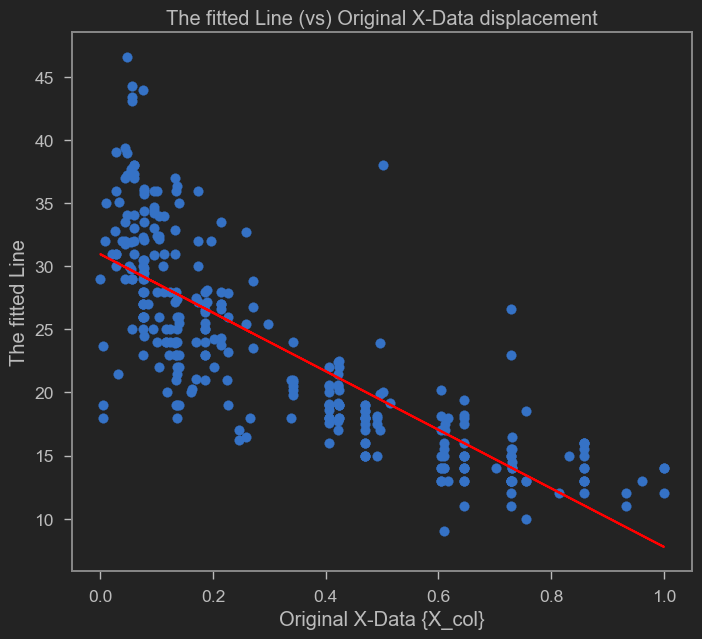

------------------------------------------------------------------------------


In [17]:
My_LR_Model("displacement" , "mpg" ,0.9,300 )

for horsepower : and the test size equal 0.2 
the score is :  0.645750673303745
------------------------------------------------------------------------------


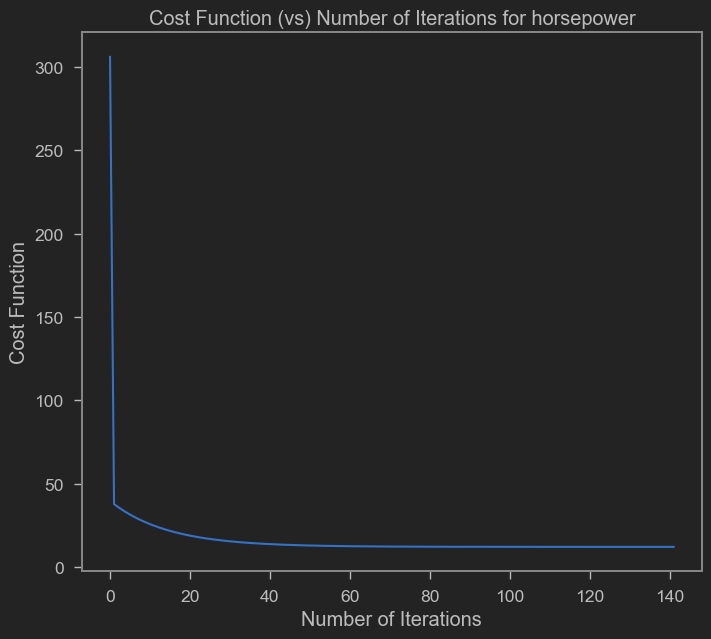

------------------------------------------------------------------------------


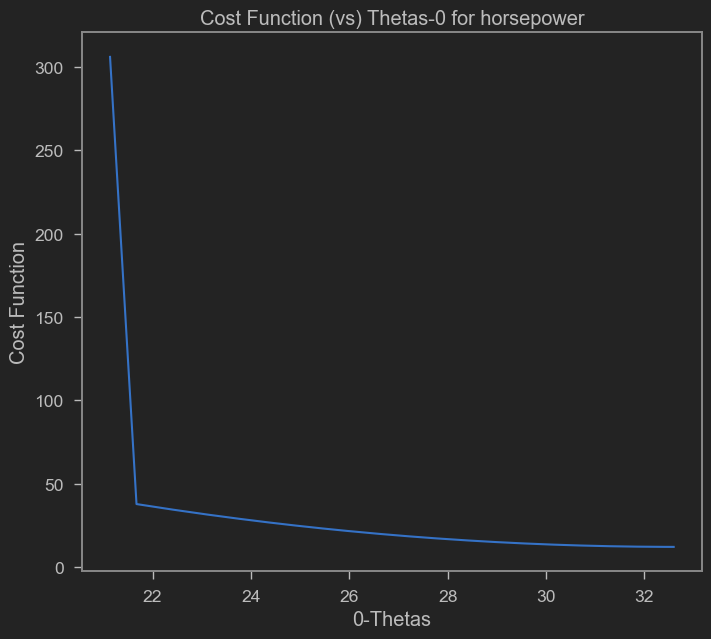

------------------------------------------------------------------------------


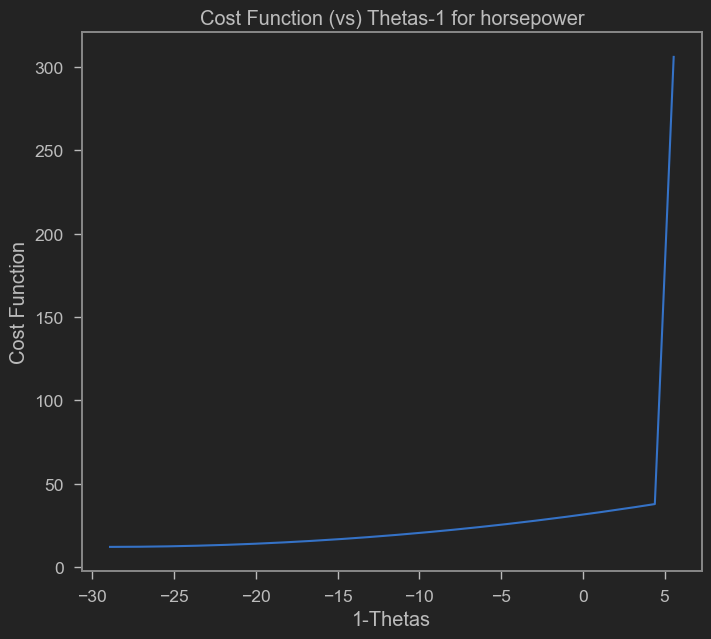

------------------------------------------------------------------------------


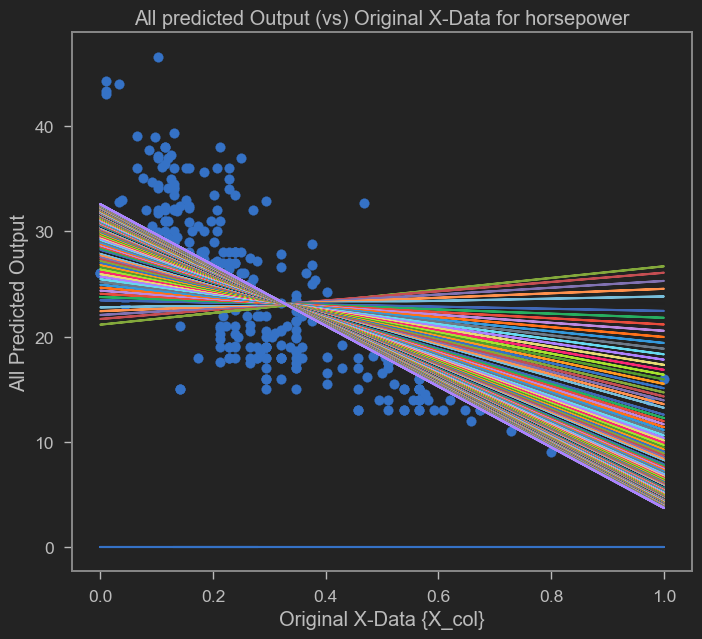

------------------------------------------------------------------------------


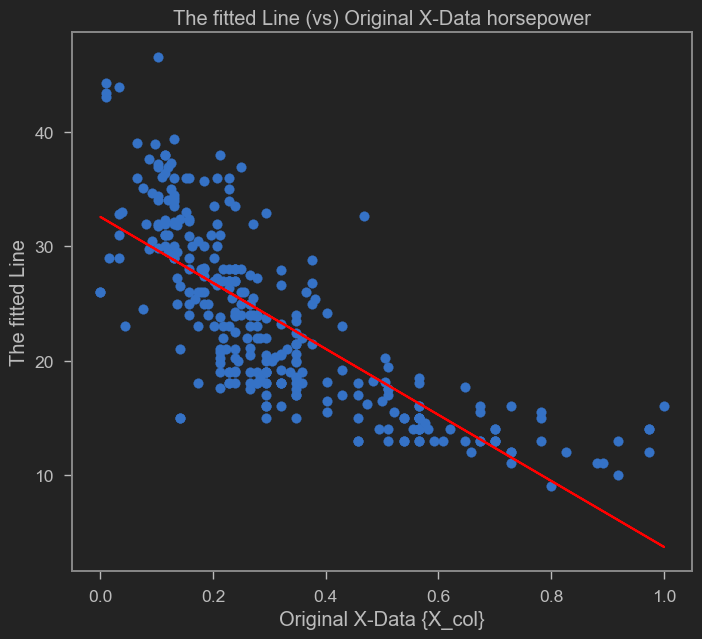

------------------------------------------------------------------------------


In [18]:
My_LR_Model("horsepower" , "mpg" ,0.9,300 )

for weight : and the test size equal 0.2 
the score is :  0.6788684899379887
------------------------------------------------------------------------------


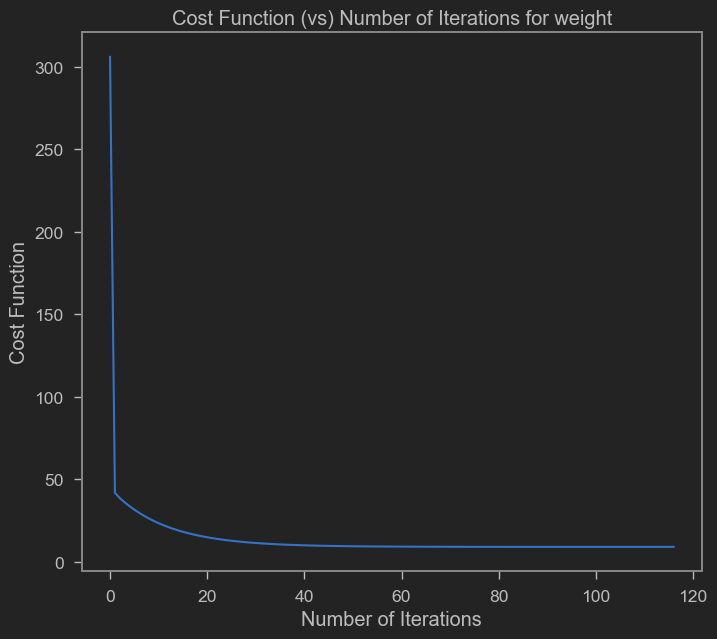

------------------------------------------------------------------------------


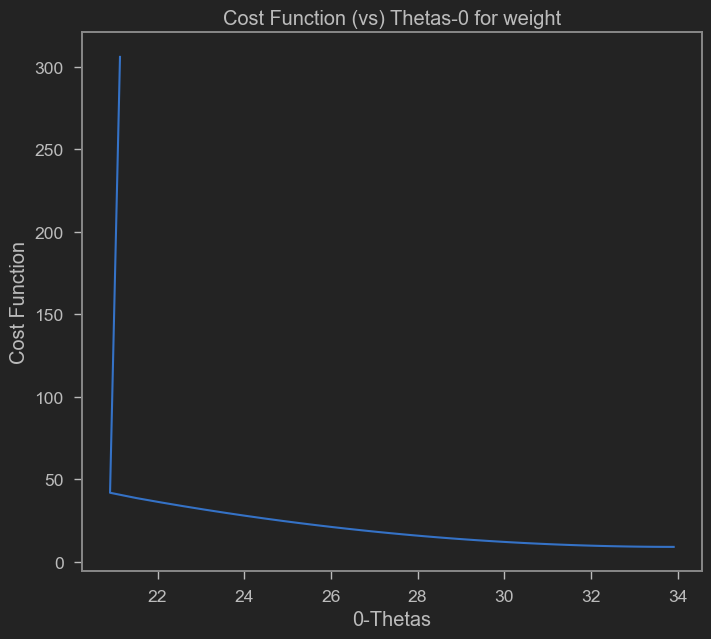

------------------------------------------------------------------------------


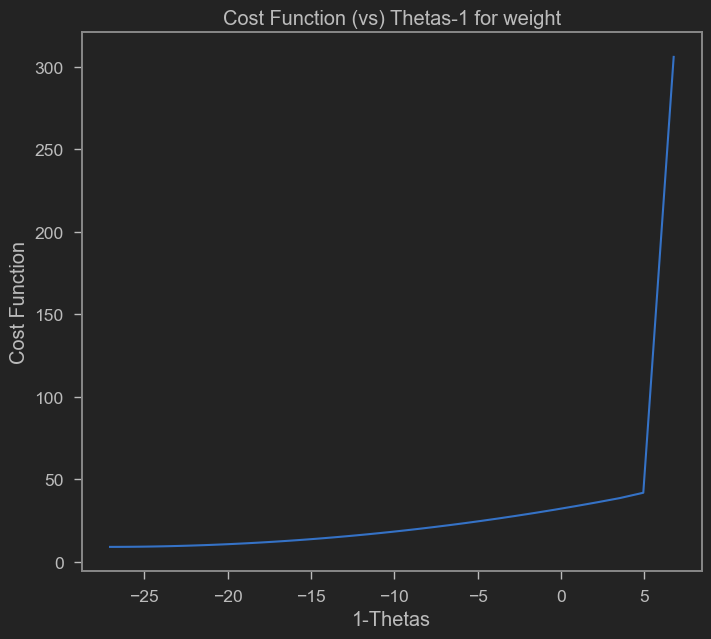

------------------------------------------------------------------------------


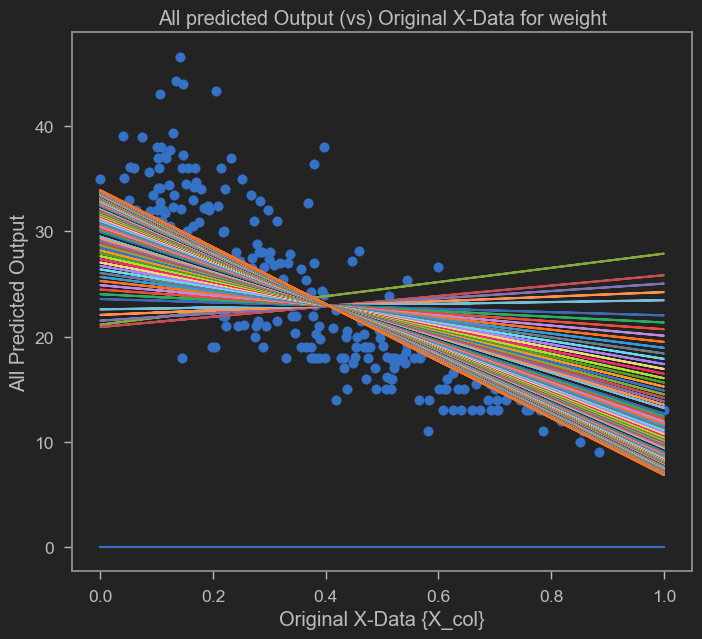

------------------------------------------------------------------------------


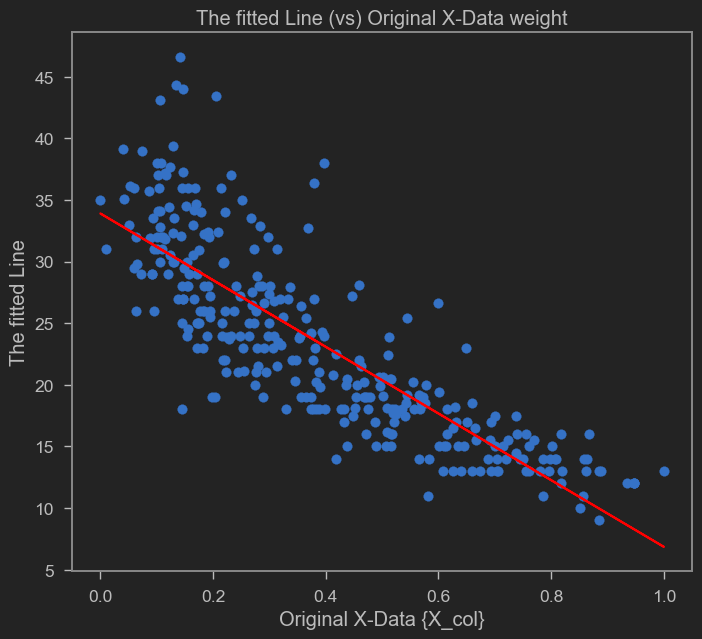

------------------------------------------------------------------------------


In [19]:
My_LR_Model("weight" , "mpg" ,0.9,300 )